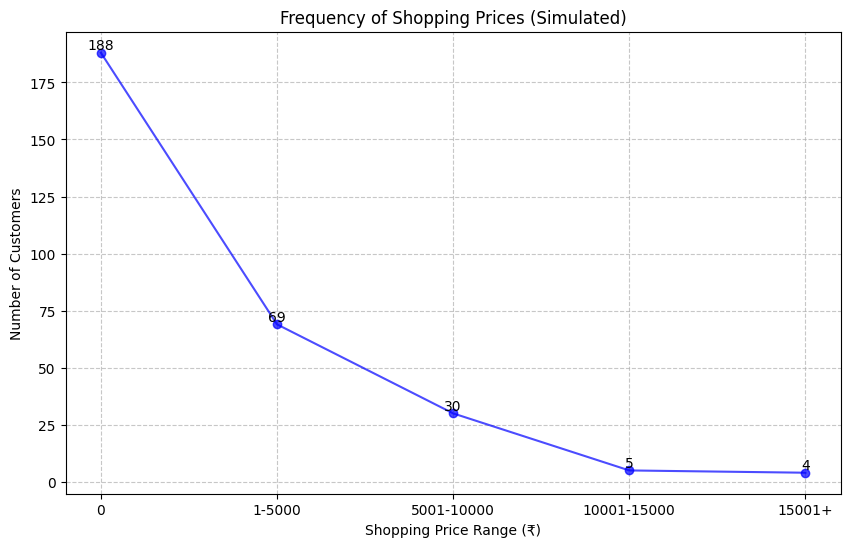

In [38]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_customers = 1000  # Total number of customers
prob_no_purchase = 0.7  # Probability that a customer does not purchase
mean_spending = 5000  # Mean for the exponential distribution
lambda_spending = 1 / mean_spending  # Rate parameter for the exponential distribution

# Initialize lists to store spending data
spending_data = []

def customer(env):
    """Simulate a customer arriving at the mall and making a purchase decision."""
    yield env.timeout(np.random.exponential(scale=1 / lambda_spending))  # Time between arrivals

    # Make purchase decision
    if np.random.rand() > prob_no_purchase:
        spending = np.random.exponential(scale=1 / lambda_spending)
        spending_data.append(spending)

def setup(env):
    """Setup the simulation environment."""
    for i in range(num_customers):
        env.process(customer(env))  # Start customer processes

# Initialize the simulation environment
env = simpy.Environment()
setup(env)  # Directly call setup without env.process
env.run()

# Define bins for categorizing spending
bins = [0, 5000, 10000, 15000, 20000, np.inf]
bin_labels = ['0', '1-5000', '5001-10000', '10001-15000', '15001+']

# Categorize spending into bins
spending_categories = np.digitize(spending_data, bins, right=True)
counts = [np.sum(spending_categories == i) for i in range(1, len(bins))]

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(bin_labels, counts, marker='o', linestyle='-', color='b', alpha=0.7)

# Annotate each data point with its value
for i, count in enumerate(counts):
    plt.text(bin_labels[i], count, str(count), ha='center', va='bottom')

plt.title('Frequency of Shopping Prices (Simulated)')
plt.xlabel('Shopping Price Range (₹)')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
